In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
Data = pd.read_csv("Student_Performance.csv")
print(Data)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

In [32]:
x = Data.iloc[:,:-1].values
y = Data.iloc[:,-1].values

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [46]:
regressor.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[50.45 53.  ]
 [53.09 50.  ]
 [78.25 80.  ]
 ...
 [64.57 66.  ]
 [25.9  27.  ]
 [18.83 21.  ]]


In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9880686410711422

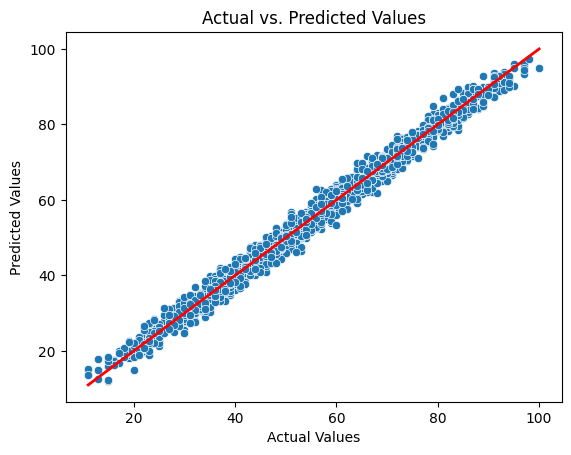

In [55]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.show()